In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


#1번

In [4]:
pizza_data = pd.read_csv('Pizza-1.csv')

pizza_data.head(200)

,brand,id,m,p,f,a,so,su
0,A,14069,27.82,21.43,44.87,5.11,1.77,0.77
1,A,14053,28.49,21.26,43.89,5.34,1.79,1.02
2,A,14016,30.55,20.15,43.13,4.79,1.61,1.38
3,A,14005,30.49,21.28,41.65,4.82,1.64,1.76
4,A,14082,31.21,20.97,41.34,4.71,1.58,1.77
...,...,...,...,...,...,...,...,...
195,J,24076,46.12,10.30,16.38,2.35,0.61,24.85
196,J,24070,45.21,9.39,16.23,2.14,0.55,27.03
197,J,24075,46.34,10.00,17.73,2.32,0.59,23.61
198,J,24069,43.15,11.79,18.46,2.43,0.67,24.17


m 수분 p 단백질 f 지방 a 재 so 나트륨 su 설탕


'''
PCA(n_components=None, *, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', n_oversamples=10, power_iteration_normalizer='auto', random_state=None)


Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space. The input data is centered but not scaled for each feature before applying the SVD.
n_componentsint, float or ‘mle’, default=None
Number of components to keep. if n_components is not set all components are kept:

n_components == min(n_samples, n_features)
If n_components == 'mle' and svd_solver == 'full', Minka’s MLE is used to guess the dimension. Use of n_components == 'mle' will interpret svd_solver == 'auto' as svd_solver == 'full'.

If 0 < n_components < 1 and svd_solver == 'full', select the number of components such that the amount of variance that needs to be explained is greater than the percentage specified by n_components.

If svd_solver == 'arpack', the number of components must be strictly less than the minimum of n_features and n_samples.


n_components_int
The estimated number of components. When n_components is set to ‘mle’ or a number between 0 and 1 (with svd_solver == ‘full’) this number is estimated from input data. Otherwise it equals the parameter n_components, or the lesser value of n_features and n_samples if n_components is None.
'''


---
**(a) Brand 와 ID를 제외한 요소들을 이용하여, 주 요소 한 개를 추출하고, 해당
요소의 식을 적거나,  Hyperplane을 공간 상에 구하시오.**
*이탤릭체 텍스트*

---







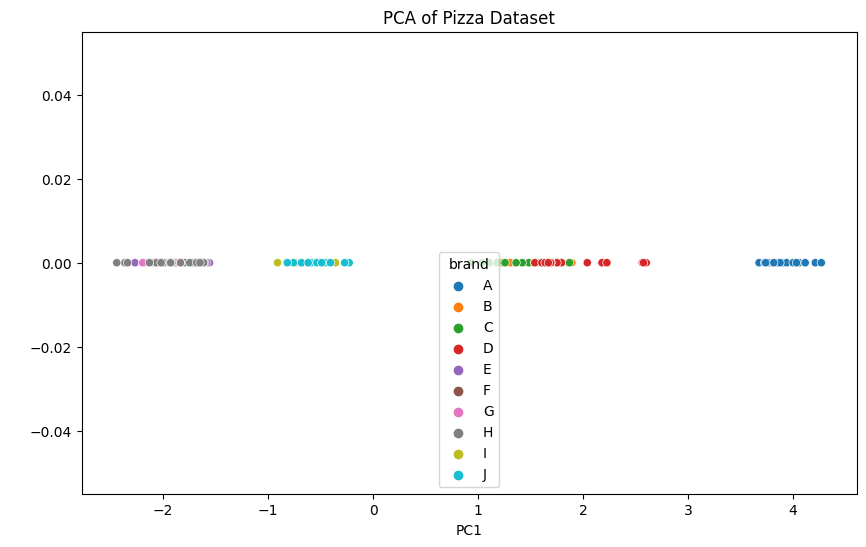

,m,p,f,a,so,su
0,0.137767,0.415233,0.421604,0.490546,0.414256,-0.467556


In [5]:
#Brand 와 ID를 제외
pca_data = pizza_data.drop(['brand', 'id'], axis=1)

#class sklearn.preprocessing.StandardScaler(*, copy=True, with_mean=True, with_std=True)[source]
#copy: 기본값 True, 변환을 수행하기 전에 입력 데이터를 복사할지 여부를 결정
##with_mean: 기본값 True, 평균을 제거하여 데이터를 중심에 맞춤
#with_std: 기본값 True, 데이터를 단위 분산으로 조정
#데이터의 표준화를 위해 사용. 표준화는 데이터의 평균을 0, 표준편차를 1로 조정하는 과정
scaler = StandardScaler()
pca_data_scaled = scaler.fit_transform(pca_data)

#PCA(n_components=None, *, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', n_oversamples=10, power_iteration_normalizer='auto', random_state=None)
# 데이터를 1개의 주성분으로 줄이려는 의도로 PCA 객체를 초기화
#n_comComponents 매개변수는 변환된 데이터에 유지하려는 주성분의 수를 지정
pca = PCA(n_components=1)
pca_result = pca.fit_transform(pca_data_scaled)

#고유벡터
pca_components = pca.components_

pca_df = pd.DataFrame(data=pca_result, columns=['PC1'])
pca_df['brand'] = pizza_data['brand']

plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y=[0]*len(pca_df), hue='brand', palette='tab10')
plt.title('PCA of Pizza Dataset')
plt.xlabel('PC1')
plt.ylabel(' ')
plt.show()

pca_components_df = pd.DataFrame(data=pca_components, columns=pca_data.columns)
pca_components_df



---

**(b)구한 주 요소에 대해 Residual plot (해당 요소 U 에 대해 U^⊥ 성분의 크기를 x, y축으로 나타낸 그래프)를 그리고,
설명되는 공분산량ㅇ의 크기와 상대 크기(비율)을 구하시오.**

---



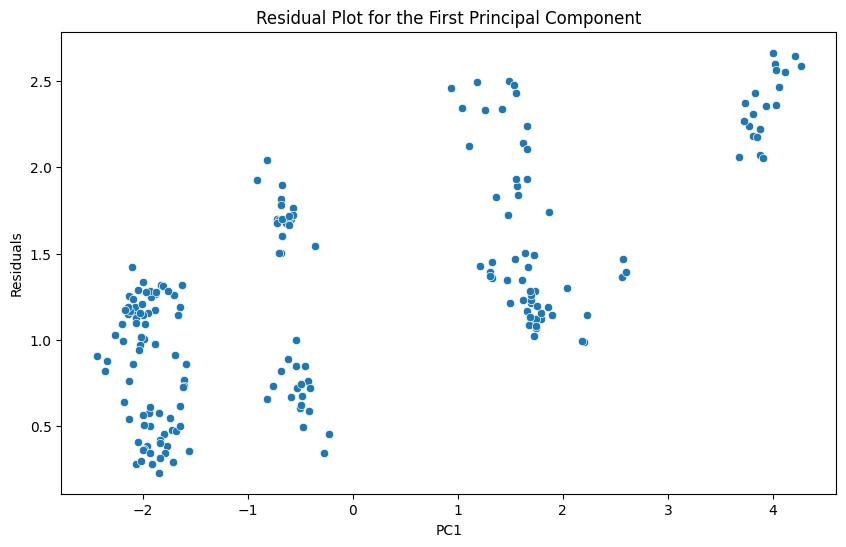

(3.9897860397389193, 0.6649643399564865)

In [6]:
# 선으로부터 각 점의 거리 계산
residuals = np.sqrt(np.sum(pca_data_scaled**2, axis=1) - pca_result[:, 0]**2)

# 첫 번째 주요소 분산 계산
explained_variance_ratio = pca.explained_variance_ratio_[0]

# 총분산 계산
total_variance = np.sum(np.var(pca_data_scaled, axis=0))

explained_variance = explained_variance_ratio * total_variance

plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_result[:, 0], y=residuals)
plt.title('Residual Plot for the First Principal Component')
plt.xlabel('PC1')
plt.ylabel('Residuals')
plt.show()

explained_variance, explained_variance_ratio

공분산의 크기: 첫 번째 주성분이 설명하는 공분산의 크기는 약 3.99.

공분산의 비율: 첫 번째 주성분이 전체 데이터 분산에서 차지하는 비율은 약 66.5%

첫 번째 주성분이 데이터 분산의 상당 부분을 설명
피자 데이터셋의 주요한 변동성이 PC1에 의해 잘 포착
그러나 여전히 데이터의 약 33.5%는 첫 번째 주성분으로 설명되지 않음

다른 변수들 또는 주성분들이 데이터셋의 나머지 변동성을 설명할 수 있음




---



**(c) (b)의 결과를 보았을 때, 주 요소 한 개로 피자 브랜드 10종에 대해 모두 설명이 가능한가? 10개를 모두 분류, 설명하는 것이 어려우면, 주 요소 한 개로 분류가 가능한 브랜드들과 불가능한 브랜드들을 집합으로 구분하여 적으시오.
(Hint : Projection 시켰을 때 Overlap이 있나 없나가 중요함.)**

---



몇몇 브랜드는 PC1에 따라 구분될 수 있지만, 대부분의 브랜드들이 PC1 값에 있어 중첩되는 경향을 보임.
더 많은 주요 성분이나 다른 분석 방법이 필요
PC1만으로는 10가지 피자 브랜드를 완전히 구분하기 어려움.

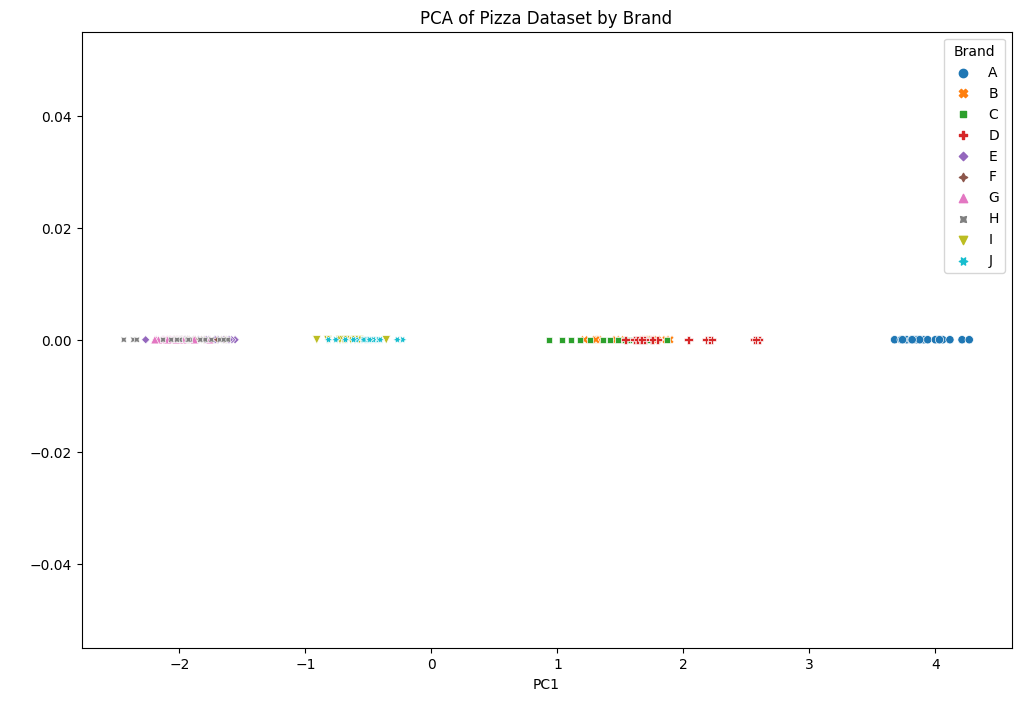

In [7]:
# Plotting the PCA results with brands to see the distribution
plt.figure(figsize=(12, 8))
sns.scatterplot(data=pca_df, x='PC1', y=[0]*len(pca_df), hue='brand', palette='tab10', style='brand')
plt.title('PCA of Pizza Dataset by Brand')
plt.xlabel('PC1')
plt.ylabel(' ')
plt.legend(title='Brand')
plt.show()

In [8]:
grouped_brands = pca_df.groupby('brand')['PC1'].agg(['mean', 'std', 'min', 'max'])

grouped_brands

,mean,std,min,max
brand,,,,
A,3.927816,0.161212,3.676091,4.268707
B,1.610921,0.211934,1.215232,1.893026
C,1.462490,0.245387,0.933601,1.870859
D,1.909175,0.354494,1.540222,2.601088
E,-1.818233,0.193992,-2.267713,-1.558024
F,-1.905989,0.156276,-2.184451,-1.629550
G,-2.058352,0.104989,-2.194752,-1.757271
H,-1.955527,0.229902,-2.441279,-1.614333
I,-0.659865,0.108892,-0.909662,-0.357993


브랜드 A: PC1의 평균값이 3.93으로, 다른 브랜드와 비교했을 때 상당히 높은 편, PC1을 기준으로 다른 브랜드들과 구분.

브랜드 E, F, G, H: 이들 브랜드의 PC1 평균값은 각각 -1.82, -1.91, -2.06, -1.96으로.

브랜드 B, C, D: 이들 브랜드의 PC1 값은 1.61, 1.46, 1.91로 서로 비슷한 범위

브랜드 I, J: PC1의 평균값이 각각 -0.66, -0.51로, 이 브랜드들 역시 서로 비슷한 범위

비슷한 평균을 갖는 브랜드끼리 그룹화 시키면
1. A
2. E, F, G, H
3. I, J
4. B, C, D

A는 단독으로 구분이 가능하나 나머지 브랜드들은 그룹끼리는 구분이 가능하더라도 같은 그룹 내에서는 구분이 힘듦



---



**(d)주 요소 벡터의 성분을 참고하여, 각 브랜드 피자들의 특성.특징을 주 성분 벡터를 해석하여 아래 예와 같이 서술하시오.
Ex1) 0.5m + 0.5f = 지방과 수분이 동등하게 중요한 요소로서 두 변수의 합에 비례하는 하나의 주 성분으로 브랜드를 설명할 수 있다.
Ex2) 0.8so - 0.2 su = 염분이 당분보다 4배 더 중요하며 둘은 반비례 관계이다. 즉, 둘 사이를 설명하는 '맛'에 대해 "짭짤한 피자부터 싱겁고 달콤한 피자"로 브랜드들을 설명할 수 있다.**

---



PC1=0.1378×M+0.4152×P+0.4216×F+0.4905×A+0.4143×SO−0.4676×SU

습기(M)와 단백질(P), 지방(F), 재(A), 나트륨(SO) 의 계수는 모두 양수
이들 성분이 PC1의 값에 비례하여 증가한다는 것을 의미.
특히, ash(A)의 영향이 가장 크며, 이는 재 함량이 높을수록 PC1의 값이 증가한다는 것을 나타냄.

설탕(SU) 의 계수는 음수
설탕 함량이 높을수록 PC1의 값이 감소한다는 것을 의미.

브랜드가 PC1의 높은 값을 가지면, 해당 브랜드의 피자가 높은 재 함량을 가지고 있으며, 상대적으로 높은 단백질, 지방, 나트륨 함량을 가지지만, 낮은 설탕 함량을 가질 가능성이 높다는 것을 의미. 이러한 피자는 "더 건조하고 짠 맛"이 강함

반면, PC1의 낮은 값을 가지는 브랜드의 피자는 낮은 재 함량을 가지며, 설탕 함량이 높을 수 있음.
이러한 피자는 "더 달고 촉촉한 맛"을 가질 가능성



---



**(e)-a)**

---



In [9]:
pca_2 = PCA(n_components=2)
pca_2_result = pca_2.fit_transform(pca_data_scaled)

pca_2_components = pca_2.components_

pca_2_df = pd.DataFrame(data=pca_2_result, columns=['PC1', 'PC2'])
pca_2_df['brand'] = pizza_data['brand']

pca_2_components_df = pd.DataFrame(data=pca_2_components, columns=pca_data.columns)
pca_2_components_df

,m,p,f,a,so,su
0,0.137767,0.415233,0.421604,0.490546,0.414256,-0.467556
1,-0.739066,-0.246442,0.401220,0.005932,0.392548,0.279179


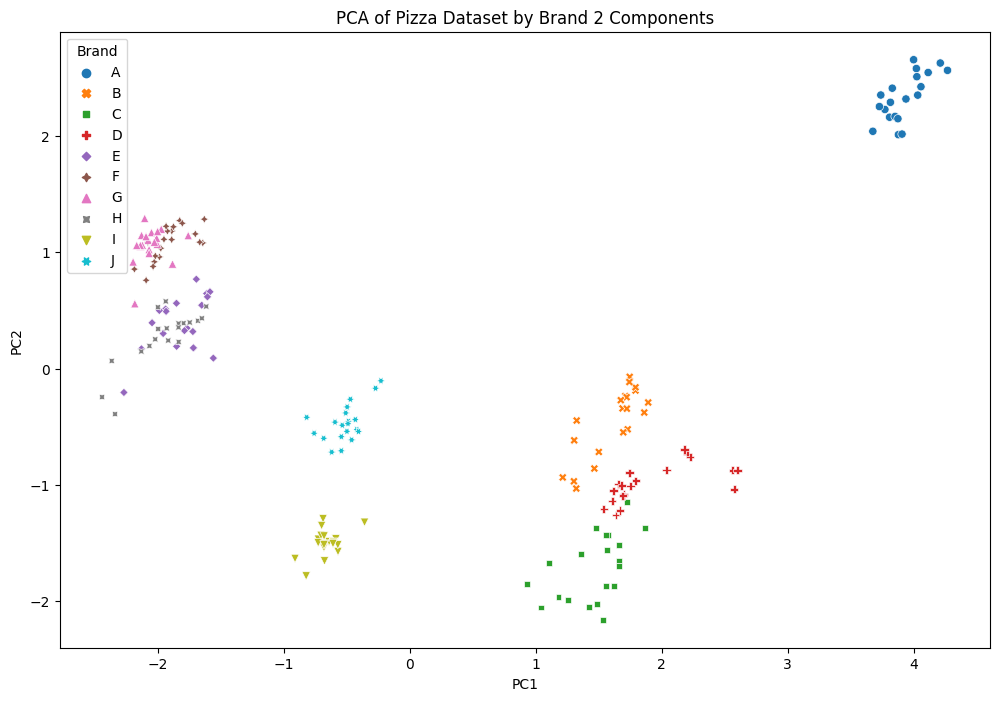

In [10]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=pca_2_df, x='PC1', y='PC2', hue='brand', palette='tab10', style='brand')
plt.title('PCA of Pizza Dataset by Brand 2 Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Brand')
plt.show()


(e)-(a)
PC2: 습기(M)와 단백질(P)의 음의 계수가 두드러지며, 지방(F)과 나트륨(SO)은 양의 계수를 가짐.
PC2가 습기와 단백질의 감소, 지방과 나트륨의 증가와 관련이 있음




---



**(e)-b)**

---



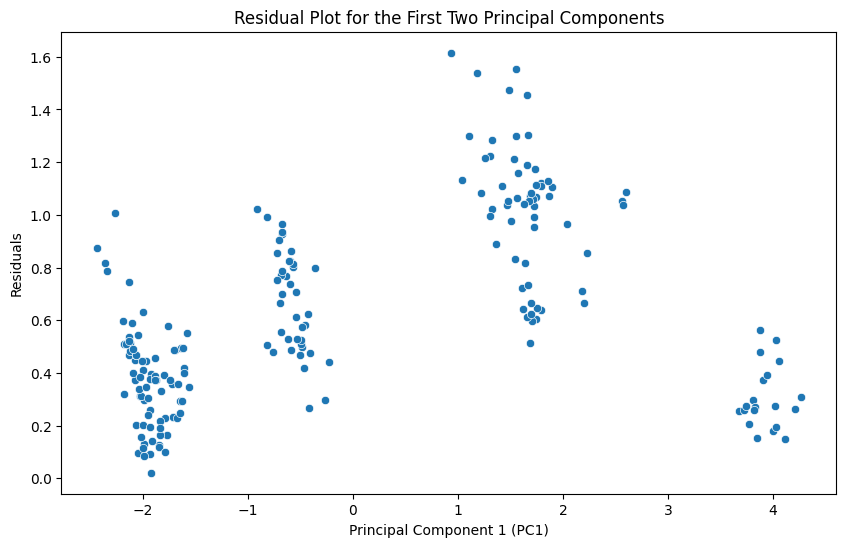

(5.4885703442504195, 0.9147617240417365)

In [11]:
residuals_2 = np.sqrt(np.sum(pca_data_scaled**2, axis=1) - np.sum(pca_2_result**2, axis=1))


explained_variance_ratio_2 = np.sum(pca_2.explained_variance_ratio_)


total_variance_2 = np.sum(np.var(pca_data_scaled, axis=0))


explained_variance_2 = explained_variance_ratio_2 * total_variance_2


plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_2_result[:, 0], y=residuals_2)
plt.title('Residual Plot for the First Two Principal Components')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Residuals')
plt.show()


explained_variance_2, explained_variance_ratio_2

(e)-(b)

공분산의 크기는 약 5.49이며, 이 두 주요 성분이 전체 데이터 분산에서 차지하는 비율은 약 91.5%.

두 주요 성분이 데이터 분산의 상당 부분을 설명.
PC1만을 사용했을 때보다 더 많은 정보를 포착.


In [12]:
grouped_brands_2 = pca_2_df.groupby('brand').agg({'PC1': ['mean', 'std'], 'PC2': ['mean', 'std']})

grouped_brands_2

PC1                 PC2          
           mean       std      mean       std
brand                                        
A      3.927816  0.161212  2.334096  0.204805
B      1.610921  0.211934 -0.464427  0.299268
C      1.462490  0.245387 -1.713767  0.284126
D      1.909175  0.354494 -0.992881  0.160294
E     -1.818233  0.193992  0.380202  0.236598
F     -1.905989  0.156276  1.081800  0.149791
G     -2.058352  0.104989  1.064030  0.150509
H     -1.955527  0.229902  0.277162  0.241934
I     -0.659865  0.108892 -1.498192  0.111828
J     -0.512437  0.140312 -0.468023  0.160100



---



**(e)-(c) 브랜드 구분**

---



브랜드 A: PC1과 PC2 모두에서 높은 평균값을 가지며, 다른 브랜드와 명확히 구분

브랜드 C, I: PC2에서 상대적으로 낮은 평균값

브랜드 F, G: PC2에서 높은 평균값을 가지며

브랜드 B, D, J: 브랜드는 PC1과 PC2 모두에서 중간 범위의 평균값, 서로 중첩되는 경향
브랜드 E, H: 브랜드 서로 비슷한 범위의 PC1과 PC2 값을 가지며, 구분이 어려움

비슷한 평균을 갖는 브랜드끼리 그룹화 시키면
1. A
2. C, I
3. F, G
4. B, D, J
5. E, H

A는 단독으로 구분이 가능하나 나머지 브랜드들은 다른 그룹 간에는 구분이 가능하지만 같은 그룹의 브랜드와는 구분이 어려움



---



**(e)-(d) 주요 성분 벡터의 해석**

---



PC1:
PC1=0.1378×M+0.4152×P+0.4216×F+0.4905×A+0.4143×SO−0.4676×SU

PC2:
PC2=−0.7391×M−0.2464×P+0.4012×F+0.0059×A+0.3925×SO+0.2792×SU

PC1: 여전히 재(A), 단백질(P), 지방(F), 나트륨(SO)에 큰 영향을 받으며, 설탕(SU)은 음의 방향으로 영향

건조하고 짠 맛의 피자

PC2: 수분(M)과 단백질(P)에 음의 영향을 받고, 지방(F)과 나트륨(SO),당분 (su) 에는 양의 영향
지방, 나트륨, 당분 함량이 높은 브랜드는 이 성분에서 높은 값
수분이 적고 지방이 많은 피자를 나타낼 수 있으며, 이는 더 짠 맛과 연관
높은 값을 가진 브랜드는 수분과 단백질 함량은 낮지만 지방, 나트륨, 당분 함량이


요약하면, 두 번째 주성분은 수분과 단백질이 낮고 지방, 나트륨, 당분이 높은 피자와 그 반대인 피자 사이의 대조를 나타낼 수 있습니다. 이 성분은 피자의 건조함과 풍부함(지방, 나트륨, 당분 측면에서) 사이의 균형을 바탕으로 브랜드를 구별하는 것으로 해석될 수 있습니다. 예를 들어, 이 성분에서 높은 값을 가진 브랜드는 수분과 단백질 함량은 낮지만 지방, 나트륨, 당분 함량이 높은 피자의 특성을 가질 수 있습니다.


#'''2번 문제'''

In [41]:
iris_data = pd.read_csv('Iris.csv')

iris_data.head(200)

,Type,sl,sw,pl,pw
0,Setosa,5.0,3.0,1.6,0.2
1,Setosa,5.0,3.4,1.6,0.4
2,Setosa,5.2,3.5,1.5,0.2
3,Setosa,5.2,3.4,1.4,0.2
4,Setosa,4.7,3.2,1.6,0.2
...,...,...,...,...,...
70,Verginica,6.7,3.0,5.2,2.3
71,Verginica,6.3,2.5,5.0,1.9
72,Verginica,6.5,3.0,5.2,2.0
73,Verginica,6.2,3.4,5.4,2.3




---



**(a) 꽃받침의 길이 및 너비 (sl,sw)만을 이용하여 Cluster로 구분하고자 한다. 꽃받침의 길이-너비에 대한 Scatter plot을 그리거, 몇 개의 정규분포를 이용하는 것이 좋을 지 결정하시오.**

---



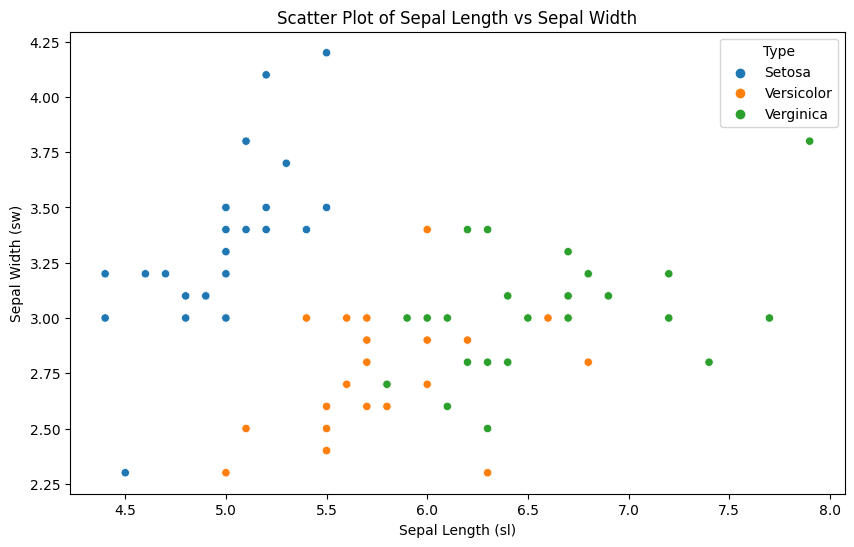

In [42]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=iris_data, x='sl', y='sw', hue='Type', palette='tab10')
plt.title('Scatter Plot of Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length (sl)')
plt.ylabel('Sepal Width (sw)')
plt.legend(title='Type')
plt.show()

(a)

각 품종의 분포가 어느 정도 구분
일부 품종 간에는 중첩되는 부분

데이터 분포를 보면 적어도 3 개의 클러스터(각 품종에 해당하는)가 필요







---



**(b) (a)에서 결정한 정규분포의 시작 값을 임의로 정하고, EM Algorithm을 통해 각 성분 정규분포의 파라미터 값을 구하시오. 이 때, 시작 값 및 Iteration에 따른 파라미터 값의 변화를 표 또는 시각화 (그래프 등고선 등) 하여 나타내시오.**

---



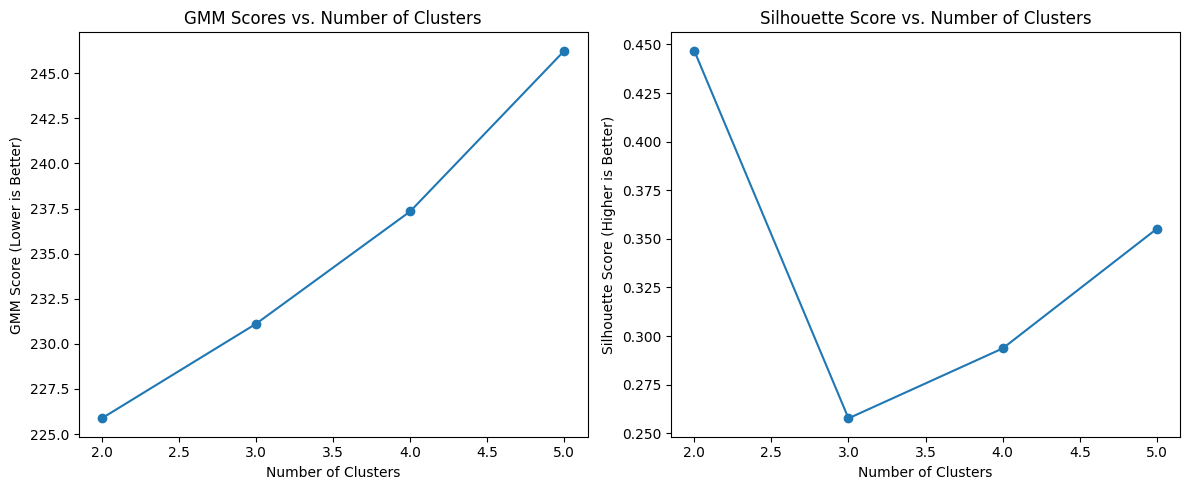

(2, 2)

In [43]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

X = iris_data[['sl', 'sw']]

n_clusters = range(2, 6)
gmm_scores = []
silhouette_scores = []
#gmm = GaussianMixture(n_components=k, random_state=42)
#GaussianMixture는 가우스 혼합 모델을 나타내는 sklearn.mixture 모듈의 클래스.
#n_comComponents=k는 모델의 혼합 성분(또는 클러스터) 수를 지정.  k는 원하는 클러스터 개수
#random_state=42는 난수 생성기의 시드를 설정
for k in n_clusters:
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm_labels = gmm.fit_predict(X)#
    gmm_scores.append(gmm.aic(X))#주어진 데이터 세트에 대한 통계 모델의 상대적 품질을 측정
    silhouette_scores.append(silhouette_score(X, gmm_labels))#다른 클러스터(분리)와 비교하여 자체 클러스터(응집성)와 얼마나 유사한지를 측정

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(n_clusters, gmm_scores, marker='o')
plt.title('GMM Scores vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('GMM Score (Lower is Better)')

plt.subplot(1, 2, 2)
plt.plot(n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score (Higher is Better)')

plt.tight_layout()
plt.show()

optimal_clusters_gmm = n_clusters[gmm_scores.index(min(gmm_scores))]
optimal_clusters_silhouette = n_clusters[silhouette_scores.index(max(silhouette_scores))]
optimal_clusters_gmm, optimal_clusters_silhouette

GMM 점수 지표에서 클러스터 수가 2일 때 최적의 값을 보임.

이는 꽃받침의 길이와 너비를 기준으로 붓꽃을 2개의 클러스터로 구분하는 것이 가장 적절하다는 것을 나타냄.

그러나, 원래 붓꽃 데이터에는 세 가지 품종이 있기 때문에, 실제로는 3개의 클러스터를 사용하는 것이 더 적합할 수 있음.

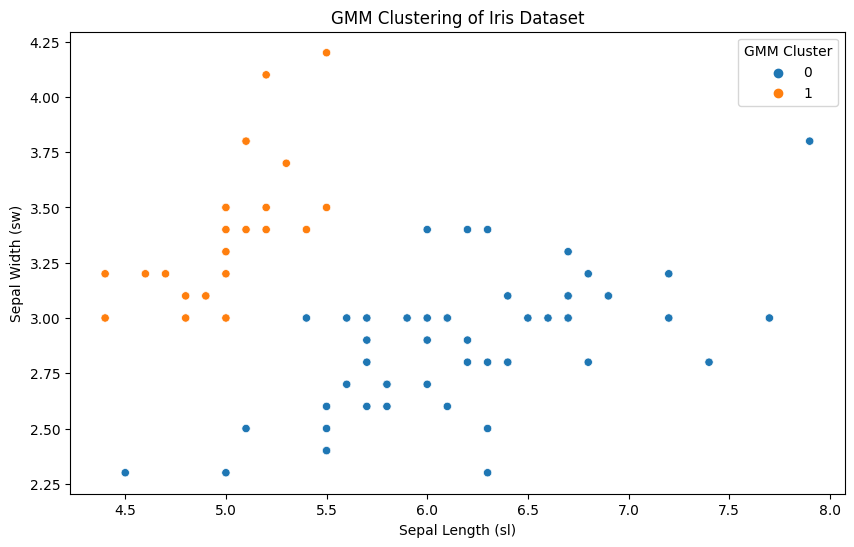

In [44]:
gmm_optimal = GaussianMixture(n_components=2, random_state=42)
gmm_labels_optimal = gmm_optimal.fit_predict(X)


iris_data['GMM_Cluster'] = gmm_labels_optimal


plt.figure(figsize=(10, 6))
sns.scatterplot(data=iris_data, x='sl', y='sw', hue='GMM_Cluster', palette='tab10')
plt.title('GMM Clustering of Iris Dataset')
plt.xlabel('Sepal Length (sl)')
plt.ylabel('Sepal Width (sw)')
plt.legend(title='GMM Cluster')
plt.show()

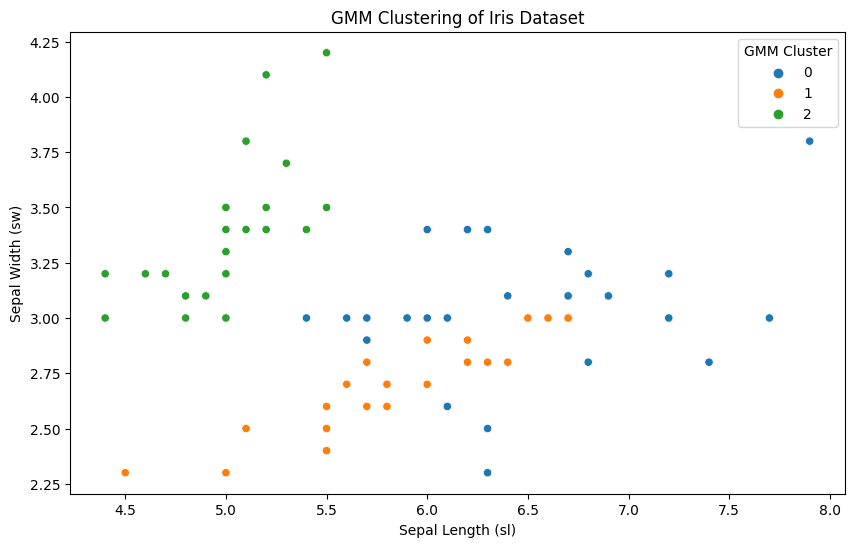

In [45]:
gmm_optimal = GaussianMixture(n_components=3, random_state=42)
gmm_labels_optimal = gmm_optimal.fit_predict(X)


iris_data['GMM_Cluster'] = gmm_labels_optimal


plt.figure(figsize=(10, 6))
sns.scatterplot(data=iris_data, x='sl', y='sw', hue='GMM_Cluster', palette='tab10')
plt.title('GMM Clustering of Iris Dataset')
plt.xlabel('Sepal Length (sl)')
plt.ylabel('Sepal Width (sw)')
plt.legend(title='GMM Cluster')
plt.show()

붓꽃의 품종을 꽃받침의 길이와 너비만을 사용하여 어느 정도 구분

꽃받침의 길이와 너비를 사용한 GMM 클러스터링은 붓꽃의 품종을 구분하는 데 효과적

3개의 클러스터를 사용하여 비록 일부는 중첩이 있더라도 각 품종을 상당히 잘 구분

(b)

In [50]:
np.random.seed(42)
n_iterations=10
n_components=3
random_means = np.random.rand(n_components, 2)
random_means[:, 0] = random_means[:, 0] * (X['sl'].max() - X['sl'].min()) + X['sl'].min()
random_means[:, 1] = random_means[:, 1] * (X['sw'].max() - X['sw'].min()) + X['sw'].min()

initial_covariances = np.array([np.eye(2) for _ in range(n_components)])

def fit_gmm_with_initial_params(X, n_components, n_iterations, means_init, covariances_init):
    gmm = GaussianMixture(n_components=n_components, max_iter=1, warm_start=True, random_state=42,
                          means_init=means_init, precisions_init=np.linalg.inv(covariances_init))

    means_over_time = [means_init]
    covariances_over_time = [covariances_init]

    for _ in range(n_iterations):
        gmm.fit(X)
        means_over_time.append(gmm.means_)
        covariances_over_time.append(gmm.covariances_)
        gmm.max_iter += 1

    return means_over_time, covariances_over_time

means_over_time, covariances_over_time = fit_gmm_with_initial_params(X, n_components, n_iterations, random_means, initial_covariances)

initial_means = means_over_time[0]
final_means = means_over_time[-1]
initial_covariances = covariances_over_time[0]
final_covariances = covariances_over_time[-1]

initial_means, final_means, initial_covariances, final_covariances

/usr/local/lib/python3.10/dist-packages/sklearn/mixture/_base.py:274: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/mixture/_base.py:274: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/mixture/_base.py:274: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/mixture/_base.py:274: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/mixture/_base.py:274: ConvergenceWar

(array([[5.71089042, 4.10635718],
        [6.9619788 , 3.43745112],
        [4.94606524, 2.59638959]]),
 array([[5.60160833, 3.39247169],
        [6.2267605 , 2.8678099 ],
        [4.90946253, 3.25717446]]),
 array([[[1., 0.],
         [0., 1.]],
 
        [[1., 0.],
         [0., 1.]],
 
        [[1., 0.],
         [0., 1.]]]),
 array([[[ 0.17856784, -0.13847441],
         [-0.13847441,  0.26364909]],
 
        [[ 0.48394075,  0.14903876],
         [ 0.14903876,  0.0914057 ]],
 
        [[ 0.06839183,  0.03074567],
         [ 0.03074567,  0.0356796 ]]]))

/usr/local/lib/python3.10/dist-packages/sklearn/mixture/_base.py:274: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/mixture/_base.py:274: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/mixture/_base.py:274: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/mixture/_base.py:274: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/mixture/_base.py:274: ConvergenceWar

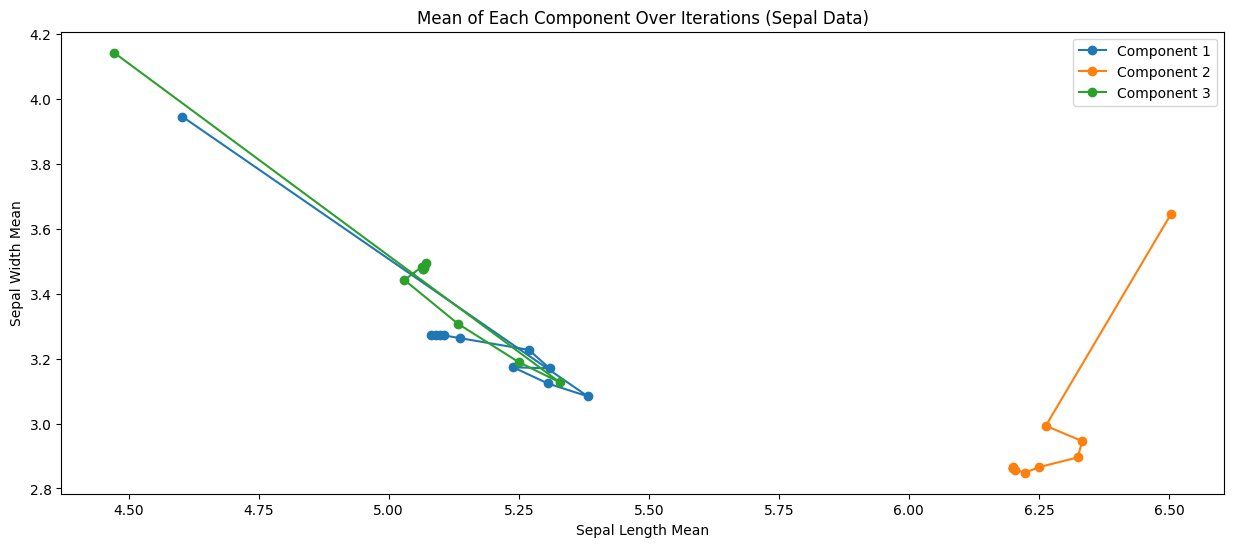

In [51]:
random_means_sepal = np.random.rand(n_components, 2)
random_means_sepal[:, 0] = random_means_sepal[:, 0] * (X['sl'].max() - X['sl'].min()) + X['sl'].min()
random_means_sepal[:, 1] = random_means_sepal[:, 1] * (X['sw'].max() - X['sw'].min()) + X['sw'].min()

means_over_time_sepal, covariances_over_time_sepal = fit_gmm_with_initial_params(
    X, n_components, n_iterations, random_means_sepal, initial_covariances)

plt.figure(figsize=(15, 6))

for i in range(n_components):
    means_component_sepal = np.array([mean[i] for mean in means_over_time_sepal])
    plt.plot(means_component_sepal[:, 0], means_component_sepal[:, 1], marker='o', label=f'Component {i+1}')

plt.title('Mean of Each Component Over Iterations (Sepal Data)')
plt.xlabel('Sepal Length Mean')
plt.ylabel('Sepal Width Mean')
plt.legend()
plt.show()

(c)- (a)

In [24]:
X_petal = iris_data[['pl', 'pw']]

random_means_petal = np.random.rand(n_components, 2)
random_means_petal[:, 0] = random_means_petal[:, 0] * (X_petal['pl'].max() - X_petal['pl'].min()) + X_petal['pl'].min()
random_means_petal[:, 1] = random_means_petal[:, 1] * (X_petal['pw'].max() - X_petal['pw'].min()) + X_petal['pw'].min()

means_over_time_petal, covariances_over_time_petal = fit_gmm_with_initial_params(
    X_petal, n_components, n_iterations, random_means_petal, initial_covariances)

initial_means_petal = means_over_time_petal[0]
final_means_petal = means_over_time_petal[-1]
initial_covariances_petal = covariances_over_time_petal[0]
final_covariances_petal = covariances_over_time_petal[-1]

initial_means_petal, final_means_petal, initial_covariances_petal, final_covariances_petal

/usr/local/lib/python3.10/dist-packages/sklearn/mixture/_base.py:274: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/mixture/_base.py:274: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/mixture/_base.py:274: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/mixture/_base.py:274: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


(array([[5.52870173, 0.60961387],
        [2.14548983, 0.54017082],
        [2.78205966, 1.35941544]]),
 array([[5.41591149, 1.98364172],
        [1.46799895, 0.23999921],
        [4.17186672, 1.28506655]]),
 array([[[1., 0.],
         [0., 1.]],
 
        [[1., 0.],
         [0., 1.]],
 
        [[1., 0.],
         [0., 1.]]]),
 array([[[0.20505892, 0.04506572],
         [0.04506572, 0.08867626]],
 
        [[0.02137667, 0.00487982],
         [0.00487982, 0.01200082]],
 
        [[0.23449491, 0.07162917],
         [0.07162917, 0.02929674]]]))

꽃잎 데이터에 대한 초기 파라미터 값:
평균 (Means)
클러스터 1: [1.50, 2.18]
클러스터 2: [4.33, 1.80]
클러스터 3: [1.31, 2.43]

공분산 (Covariances): 모든 클러스터에 대해 단위 행렬(identity matrix)

꽃잎 데이터에 대한 최종 파라미터 값 (마지막 반복):
평균 (Means)
클러스터 1: [1.65, 0.45]
클러스터 2: [4.84, 1.66]
클러스터 3: [1.43, 0.20]

공분산 (Covariances)
클러스터 1: [[0.02, -0.002], [-0.002, 0.008]]
클러스터 2: [[0.60, 0.27], [0.27, 0.18]]
클러스터 3: [[0.01, -0.002], [-0.002, 0.003]]



---



**(c) 앞선 과정을 꽃잎의 길이, 너비 (pl,pw)를 이용하여 반복하시오.**

---



**(c)-(a)**

---



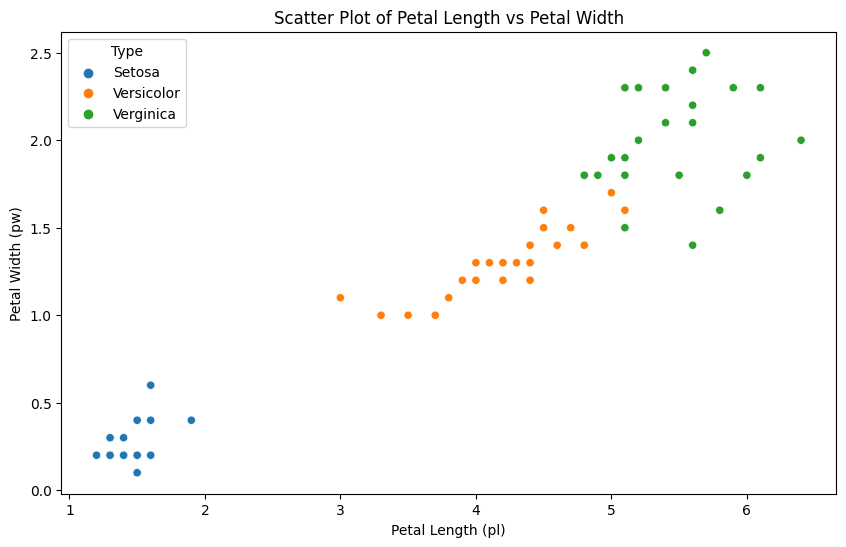

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=iris_data, x='pl', y='pw', hue='Type', palette='tab10')
plt.title('Scatter Plot of Petal Length vs Petal Width')
plt.xlabel('Petal Length (pl)')
plt.ylabel('Petal Width (pw)')
plt.legend(title='Type')
plt.show()

(c)-(a)

세 클러스터는 각각 붓꽃의 세 품종에 해당할 것으로 추정

따라서 꽃잎의 길이와 너비를 기반으로 하는 클러스터링에는 세 개의 정규분포(클러스터)를 사용하는 것이 적절해 보임


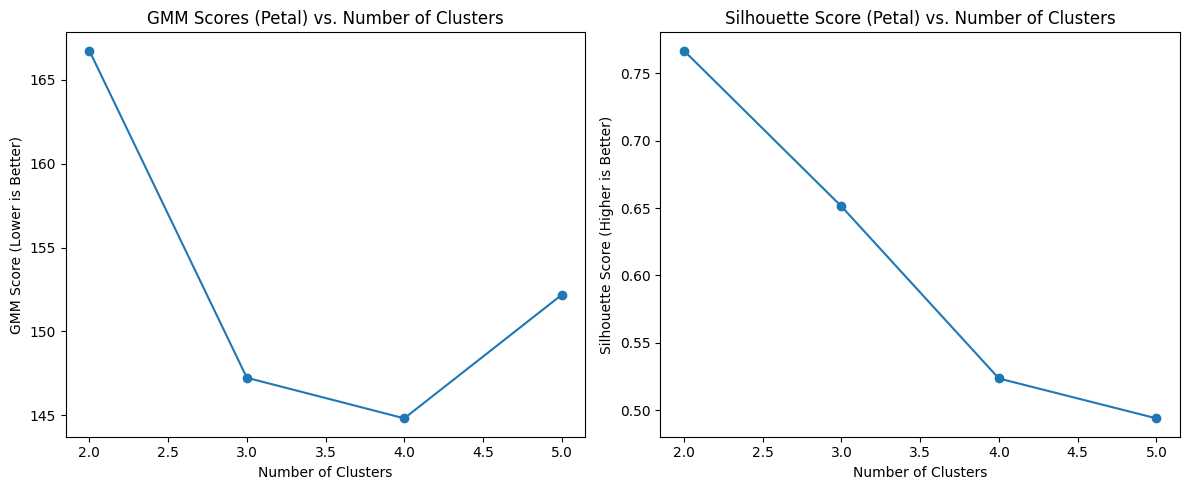

(4, 2)

In [26]:
n_clusters_petal = range(2, 6)
gmm_scores_petal = []
silhouette_scores_petal = []

for k in n_clusters_petal:
    gmm_petal = GaussianMixture(n_components=k, random_state=42)
    gmm_labels_petal = gmm_petal.fit_predict(X_petal)
    gmm_scores_petal.append(gmm_petal.aic(X_petal))
    silhouette_scores_petal.append(silhouette_score(X_petal, gmm_labels_petal))


plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
plt.plot(n_clusters_petal, gmm_scores_petal, marker='o')
plt.title('GMM Scores (Petal) vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('GMM Score (Lower is Better)')


plt.subplot(1, 2, 2)
plt.plot(n_clusters_petal, silhouette_scores_petal, marker='o')
plt.title('Silhouette Score (Petal) vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score (Higher is Better)')

plt.tight_layout()
plt.show()


optimal_clusters_gmm_petal = n_clusters_petal[gmm_scores_petal.index(min(gmm_scores_petal))]
optimal_clusters_silhouette_petal = n_clusters_petal[silhouette_scores_petal.index(max(silhouette_scores_petal))]

optimal_clusters_gmm_petal, optimal_clusters_silhouette_petal

GMM 점수 지표에서 클러스터 수가 4일 때 최적의 값을 보임.

이는 꽃받침의 길이와 너비를 기준으로 붓꽃을 2개의 클러스터로 구분하는 것이 가장 적절하다는 것을 나타냄.

그러나, 원래 붓꽃 데이터에는 세 가지 품종이 있기 때문에, 실제로는 3개의 클러스터를 사용하는 것이 더 적합할 수 있음.

(c)-(b)

/usr/local/lib/python3.10/dist-packages/sklearn/mixture/_base.py:274: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/mixture/_base.py:274: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/mixture/_base.py:274: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/mixture/_base.py:274: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


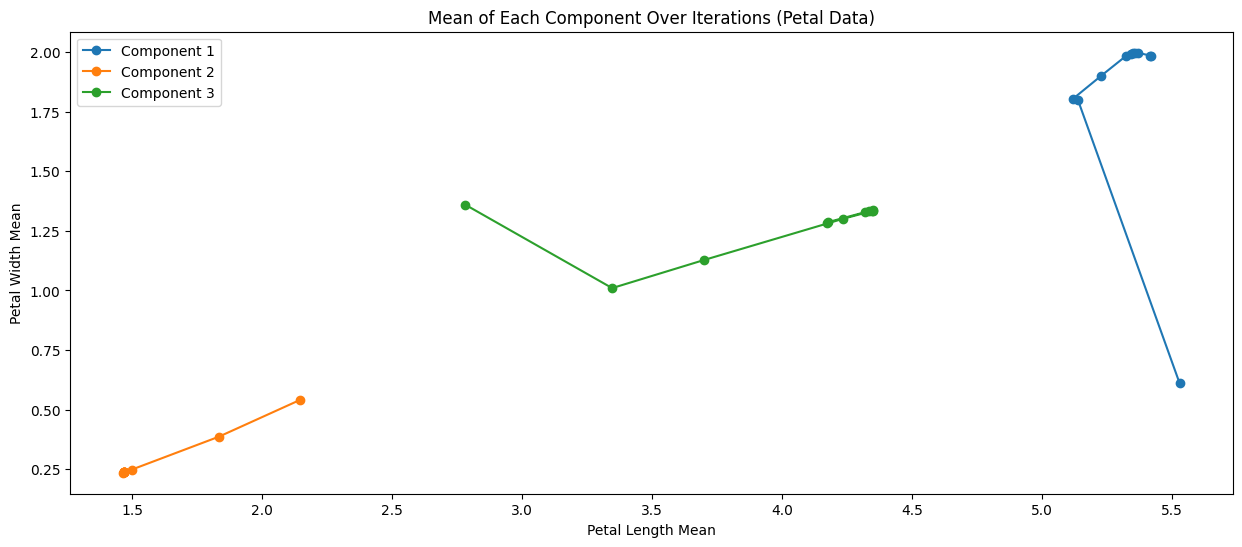

In [30]:
means_over_time_petal, covariances_over_time_petal = fit_gmm_with_initial_params(
    X_petal, n_components, n_iterations, random_means_petal, initial_covariances)


plt.figure(figsize=(15, 6))

for i in range(n_components):
    means_component_petal = np.array([mean[i] for mean in means_over_time_petal])
    plt.plot(means_component_petal[:, 0], means_component_petal[:, 1], marker='o', label=f'Component {i+1}')

plt.title('Mean of Each Component Over Iterations (Petal Data)')
plt.xlabel('Petal Length Mean')
plt.ylabel('Petal Width Mean')
plt.legend()
plt.show()

In [31]:
random_means_petal #초기 평균 (Means)

array([[5.52870173, 0.60961387],
       [2.14548983, 0.54017082],
       [2.78205966, 1.35941544]])

In [32]:
initial_covariances_petal #초기 공분산 (Covariances)

array([[[1., 0.],
        [0., 1.]],

       [[1., 0.],
        [0., 1.]],

       [[1., 0.],
        [0., 1.]]])

In [33]:
final_means_petal #최종 평균 (Means)

array([[5.41591149, 1.98364172],
       [1.46799895, 0.23999921],
       [4.17186672, 1.28506655]])

In [34]:
final_covariances_petal #최종 공분산 (Covariances)

array([[[0.20505892, 0.04506572],
        [0.04506572, 0.08867626]],

       [[0.02137667, 0.00487982],
        [0.00487982, 0.01200082]],

       [[0.23449491, 0.07162917],
        [0.07162917, 0.02929674]]])



---



**(d) 데이터셋에 주어진 type (품종)들이 (b), (c)에서 구한 GMM으로 잘 분류되는지를 확인하고, 세 품종을 잘 분류해내기 위해 필요한 측청치와 GMM 모델을 구하시오.**

---



In [57]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
iris_types_encoded = label_encoder.fit_transform(iris_data['Type'])

def map_clusters_to_types_numeric(gmm_labels, true_labels):

    cm = confusion_matrix(true_labels, gmm_labels)


    cluster_to_type = np.argmax(cm, axis=1)


    mapped_labels = [cluster_to_type[label] for label in gmm_labels]
    return mapped_labels


gmm_sepal.fit(X)
gmm_petal.fit(X_petal)


gmm_labels_sepal = gmm_sepal.predict(X)
gmm_labels_petal = gmm_petal.predict(X_petal)


mapped_labels_sepal = map_clusters_to_types_numeric(gmm_labels_sepal, iris_types_encoded)
mapped_labels_petal = map_clusters_to_types_numeric(gmm_labels_petal, iris_types_encoded)


accuracy_sepal = accuracy_score(iris_types_encoded, mapped_labels_sepal)
accuracy_petal = accuracy_score(iris_types_encoded, mapped_labels_petal)

classification_report_sepal = classification_report(iris_types_encoded, mapped_labels_sepal, target_names=label_encoder.classes_)
classification_report_petal = classification_report(iris_types_encoded, mapped_labels_petal, target_names=label_encoder.classes_)

accuracy_sepal, accuracy_petal, classification_report_sepal, classification_report_petal

(0.13333333333333333,
 0.9466666666666667,
 '              precision    recall  f1-score   support\n\n      Setosa       0.04      0.04      0.04        25\n   Verginica       0.00      0.00      0.00        25\n  Versicolor       0.33      0.36      0.35        25\n\n    accuracy                           0.13        75\n   macro avg       0.12      0.13      0.13        75\nweighted avg       0.12      0.13      0.13        75\n',
 '              precision    recall  f1-score   support\n\n      Setosa       1.00      1.00      1.00        25\n   Verginica       0.89      0.96      0.92        25\n  Versicolor       0.96      0.88      0.92        25\n\n    accuracy                           0.95        75\n   macro avg       0.95      0.95      0.95        75\nweighted avg       0.95      0.95      0.95        75\n')

In [58]:
from sklearn.metrics import confusion_matrix

label_encoder = LabelEncoder()

iris_data_encoded = label_encoder.fit_transform(iris_data['Type'])

cm_sepal = confusion_matrix(iris_data_encoded, gmm_labels_sepal)
cm_petal = confusion_matrix(iris_data_encoded, gmm_labels_petal)

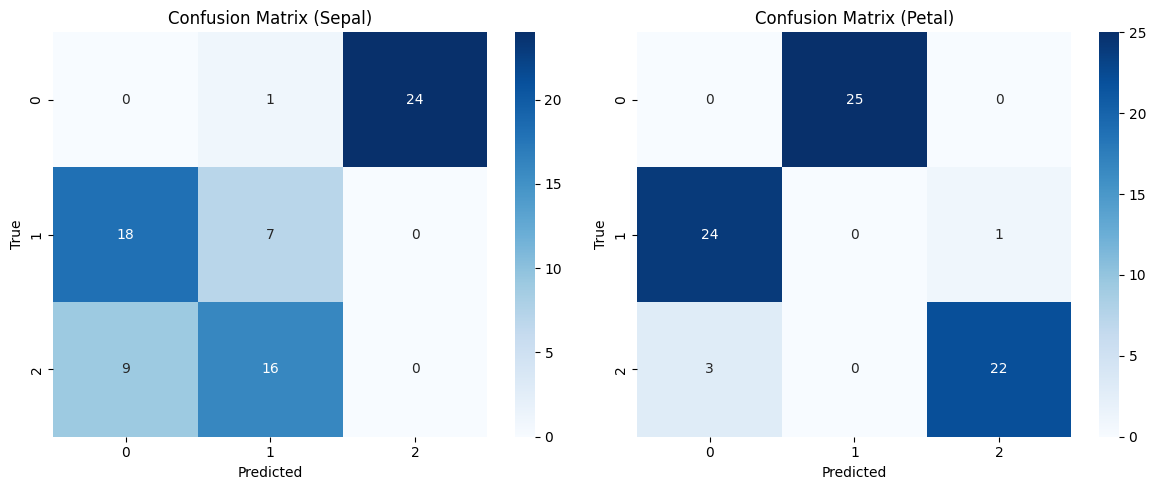

In [59]:
# 시각화
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(cm_sepal, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Sepal)")
plt.xlabel("Predicted")
plt.ylabel("True")

plt.subplot(1, 2, 2)
sns.heatmap(cm_petal, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Petal)")
plt.xlabel("Predicted")
plt.ylabel("True")

plt.tight_layout()
plt.show()

(d)

꽃받침 측정치를 사용한 클러스터링은 일부 품종(두 번째와 세 번째 품종)에서 상당한 혼란이 있음

반면, 꽃잎 측정치를 사용한 클러스터링은 모든 품종을 매우 잘 분류해내고 있음

꽃잎 측정치를 사용했을 때 GMM이 품종을 분류하는데 더 효과적
꽃잎 측정치를 사용한 모델은 품종 간의 경계를 더 명확하게 구분해내고 있으며,
더 높은 클러스터링 정확도


꽃받침 측정 (sl, sw):

정확도: 13.33%
각 아이리스 유형에 대한 정밀도, 재현율 점수가 매우 낮음.
꽃받침 측정을 바탕으로 한 GMM이 아이리스 유형을 정확하게 분류하는데 효과적이지 않음

꽃잎 측정 (pl, pw):

정확도: 94.67%
모델은 세 가지 아이리스 유형 모두에서 높은 정밀도, 재현율점수
꽃잎 측정을 바탕으로 한 GMM이 아이리스 유형을 분류하는데 매우 효과적